In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [69]:
train=pd.read_csv("C:/Users/dell/Documents/datasets/bigmart sales dataser/Train.csv")


In [70]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


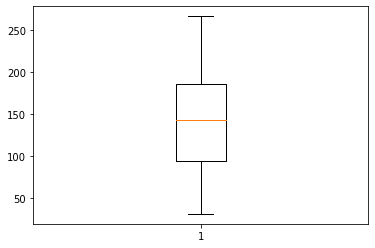

In [71]:
plt.boxplot(train['Item_MRP'])
plt.show()

In [72]:
ida=train[train['Item_Outlet_Sales']>6500].index
train.drop(ida, inplace=True)

tit=train[train['Item_Visibility']>0.20].index
train.drop(tit, inplace=True)

In [73]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [74]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [75]:
train.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)

In [76]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train['Outlet_Type']=label.fit_transform(train['Outlet_Type'])
train['Outlet_Location_Type']=label.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Size']=label.fit_transform(train['Outlet_Size'])
train['Item_Fat_Content']=label.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=label.fit_transform(train['Item_Type'])

In [77]:
hew=train.corr()

<AxesSubplot:>

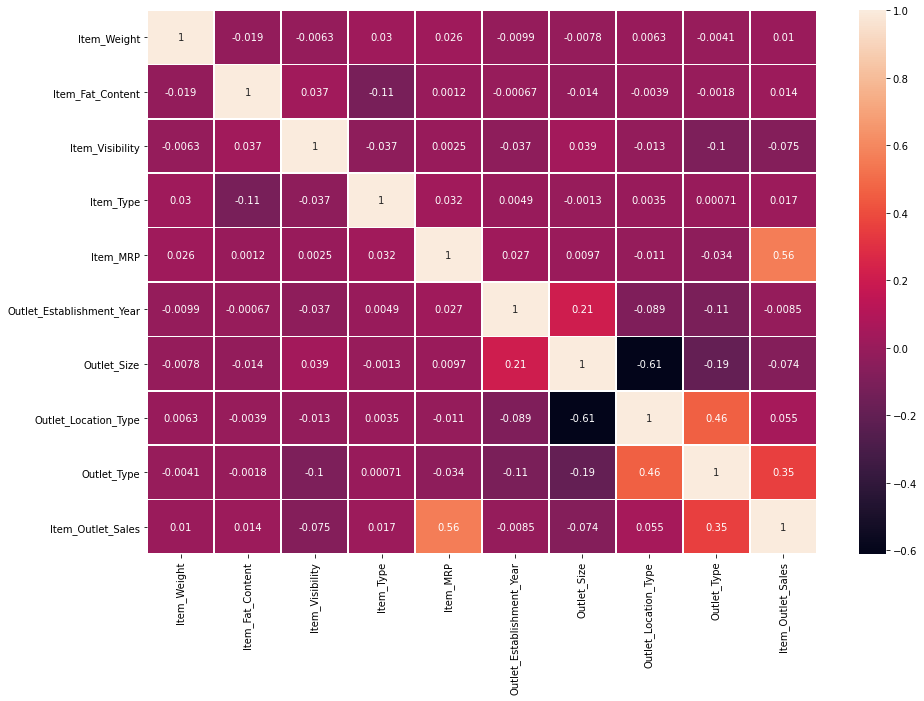

In [78]:
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(hew, annot=True, linewidth=.6, ax=ax)

In [79]:
train['Item_Visibility'].astype('category')
train['Item_Type']=train['Item_Type'].astype('category')
train['Outlet_Size']=train['Outlet_Size'].astype('category')
train['Outlet_Location_Type']=train['Outlet_Location_Type'].astype('category')
train['Outlet_Type']=train['Outlet_Type'].astype('category')

In [80]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018583,-0.006300,0.026137,-0.009880,0.010442
Item_Fat_Content,-0.018583,1.000000,0.037163,0.001217,-0.000667,0.013775
Item_Visibility,-0.006300,0.037163,1.000000,0.002541,-0.036639,-0.075422
Item_MRP,0.026137,0.001217,0.002541,1.000000,0.027191,0.563191
Outlet_Establishment_Year,-0.009880,-0.000667,-0.036639,0.027191,1.000000,-0.008511
Item_Outlet_Sales,0.010442,0.013775,-0.075422,0.563191,-0.008511,1.000000


In [81]:
x=train[['Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type']]
y=train['Item_Outlet_Sales']

In [82]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1234)

<h2> Linear Regression

In [83]:
decision=LinearRegression()
decision.fit(x_train,y_train)
prediction=decision.predict(x_test)
mse( prediction, y_test)
mae(prediction, y_test)
r2_linear=r2(prediction, y_test)

LinearRegression()

<h2> Random Forest

In [86]:
random=RandomForestRegressor()
random.fit(x_train,y_train)
pred=random.predict(x_test)
r2(y_test, pred)

0.5188073764694813

In [104]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[10,100,1000],'max_depth':range(1,16),'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(estimator=random, param_grid=params, verbose=1, cv=20)
grid.fit(x_train, y_train)

Fitting 20 folds for each of 135 candidates, totalling 2700 fits


GridSearchCV(cv=20, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 16),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

In [108]:
RandomForest=grid.best_estimator_
pred_random=RandomForest.predict(x_test)
mse_random=mse(y_test, pred_random)
mae_random=mae(y_test, pred_random)

<H2> Prediction using the test set

In [117]:
test=pd.read_csv("C:/Users/dell/Documents/datasets/bigmart sales dataser/Test.csv")

In [118]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [119]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [120]:
test.shape

(5681, 11)

In [121]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
test['Outlet_Type']=label.fit_transform(test['Outlet_Type'])
test['Outlet_Location_Type']=label.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Size']=label.fit_transform(test['Outlet_Size'])
test['Item_Fat_Content']=label.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=label.fit_transform(test['Item_Type'])
test['Item_Visibility']=test['Item_Visibility'].astype('category')
test['Item_Type']=test['Item_Type'].astype('category')
test['Outlet_Size']=test['Outlet_Size'].astype('category')
test['Outlet_Location_Type']=test['Outlet_Location_Type'].astype('category')
test['Outlet_Type']=test['Outlet_Type'].astype('category')

In [123]:
test=test.drop(columns=['Item_Identifier','Item_Visibility','Outlet_Establishment_Year', 'Outlet_Identifier','Outlet_Size'], axis=1)

In [125]:
test_prediction=RandomForest.predict(test)

In [126]:
test[['Item_Outlet_Sales']]= test_prediction

test[['Item_Outlet_Sales']].to_csv("C:/Users/dell/Documents/datasets/bigmart sales dataser/Prediction.csv")